In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
%matplotlib inline

# Importing the Dataset and EDA

In [72]:
data= pd.read_csv('Iris.csv')

In [73]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
data.shape

(150, 6)

In [75]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [77]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### To check for data cleaning, we'll plot Heatmap to check for null values

<AxesSubplot:>

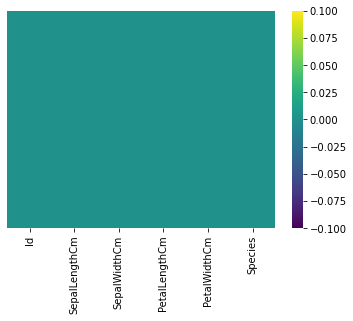

In [78]:
sns.heatmap(data.isnull(),yticklabels= False, cmap= 'viridis')

### we donot have any null values here

In [79]:
data=data.set_index('Id')

In [80]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


#### Plotting our data

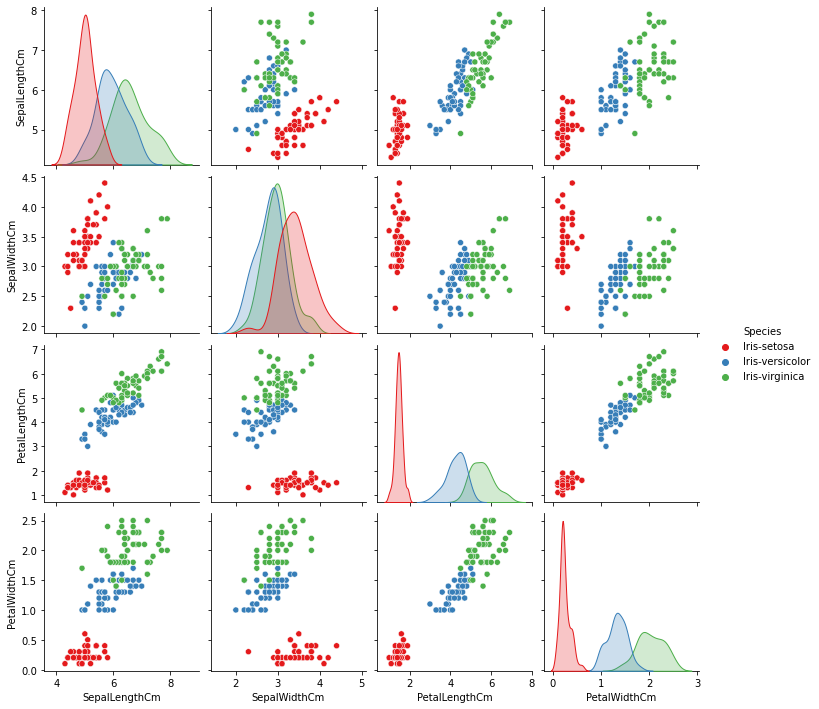

In [81]:
sns.pairplot(data, hue='Species', palette= 'Set1')

#### Here we can observe setosa(in red) is quiet distinct from other 2 species i.e Other 2 might have some relation between  them 

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

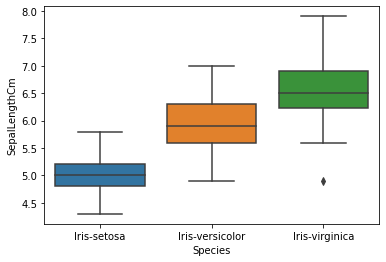

In [82]:
sns.boxplot(x= "Species",y= "SepalLengthCm", data= data)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

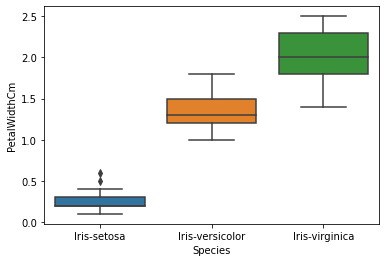

In [83]:
sns.boxplot(x= "Species",y= "PetalWidthCm", data= data)

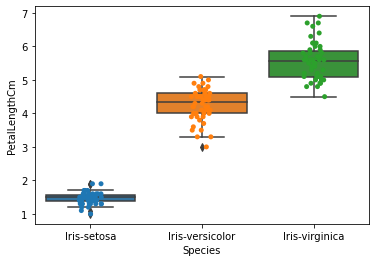

In [84]:
plot=sns.boxplot(x= "Species",y= "PetalLengthCm", data= data)
plot=sns.stripplot(x= "Species",y= "PetalLengthCm", data= data, jitter=True, edgecolor='gray')
plt.show()

#### For versicolor and virginica there are quiet outliers

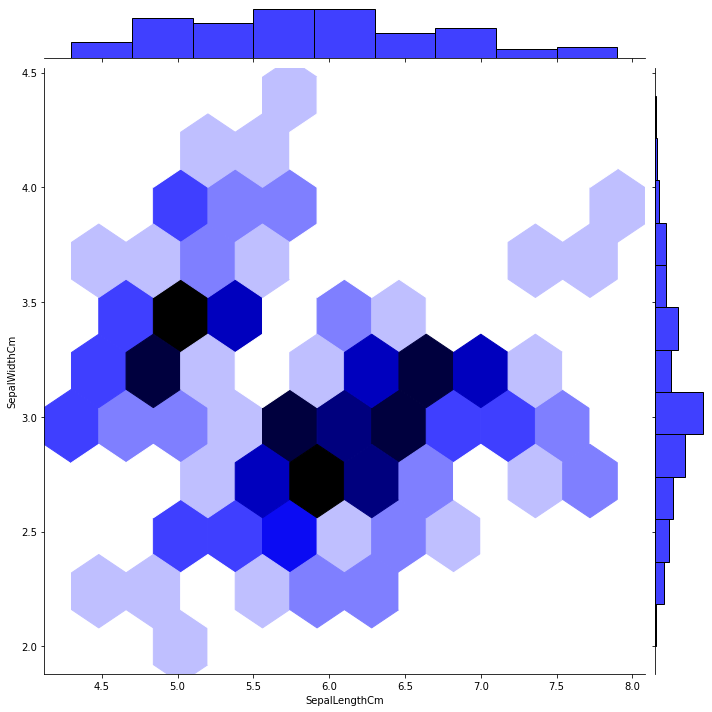

In [85]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=data, height=10,ratio=10, kind='hex',color='blue')
plt.show()

# Shuffling the dataset

In [86]:
data = data.sample(frac=1)

In [87]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
53,6.9,3.1,4.9,1.5,Iris-versicolor
97,5.7,2.9,4.2,1.3,Iris-versicolor
86,6.0,3.4,4.5,1.6,Iris-versicolor
141,6.7,3.1,5.6,2.4,Iris-virginica


# Encoding target data

In [88]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [89]:
label_encode = LabelEncoder()

In [90]:
data['Encoded Species']= label_encode.fit_transform(data['Species'])

In [91]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
53,6.9,3.1,4.9,1.5,Iris-versicolor,1
97,5.7,2.9,4.2,1.3,Iris-versicolor,1
86,6.0,3.4,4.5,1.6,Iris-versicolor,1
141,6.7,3.1,5.6,2.4,Iris-virginica,2


# Setosa=0
# versicolor=1
# virginica=2

#### Converting label column into an array

In [92]:
enc_data = label_encode.fit_transform(data['Species'])
enc_data

array([0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1,
       0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0])

# Train Test Split

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = data.iloc[:,:-2].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [6.9, 3.1, 4.9, 1.5],
       [5.7, 2.9, 4.2, 1.3],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 5.6, 2.4],
       [5.1, 3.8, 1.6, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [6.1, 2.8, 4. , 1.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.1, 2.9, 4.7, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.7, 2.5, 5. , 2. ],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [6.4, 3.2, 4.5, 1.5],
       [7.1, 3. , 5.9, 2.1],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 5.1, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [6.3, 2.5, 5. , 1.9],
       [5.4, 3.4, 1.7, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [7.6, 3. , 6.6, 2.1],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.6, 3. , 4.1, 1.3],
       [5.6, 2.8, 4.9, 2. ],
       [5.8, 4. , 1.2, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3.3, 1.4, 0.2],
       [4.8, 3

In [95]:
X.shape

(150, 4)

In [96]:
y = enc_data
y

array([0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1,
       0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Building Decision Tree model, training and predictions

In [132]:
from sklearn import tree

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
dtree = DecisionTreeClassifier()

In [135]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [136]:
predictions = dtree.predict(X_test)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.88      0.64      0.74        11
           2       0.73      0.92      0.81        12

    accuracy                           0.89        45
   macro avg       0.87      0.85      0.85        45
weighted avg       0.90      0.89      0.89        45



In [139]:
print(confusion_matrix(y_test, predictions))

[[22  0  0]
 [ 0  7  4]
 [ 0  1 11]]


# testing our model on random test case

In [140]:
trial = np.array([[7.3,2.9,6.3,1.4]])

In [141]:
pred_trial = dtree.predict(trial)
pred_trial

array([1])

In [142]:
trial1 = np.array([[5.6, 3.0, 4.5, 1.4]])

In [143]:
pred_trial = dtree.predict(trial)
pred_trial

array([1])

In [144]:
trialc = np.array([[4.9, 3.0, 1.4, 0.2]])

In [145]:
predt = dtree.predict(trialc)
predt

array([0])

# Visualizing Decision Tree using Graphviz

In [193]:
!pip install graphviz

In [194]:
from IPython.display import Image

In [195]:
import graphviz

In [196]:
from six import StringIO
from sklearn.tree import export_graphviz

In [197]:
import pydotplus

In [198]:
features = list(data.columns[:-2])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [199]:
target = list(data.Species.unique())
target

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [202]:
dot_data = tree.export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True, special_characters=True,class_names=target)
graph = graphviz.Source(dot_data)

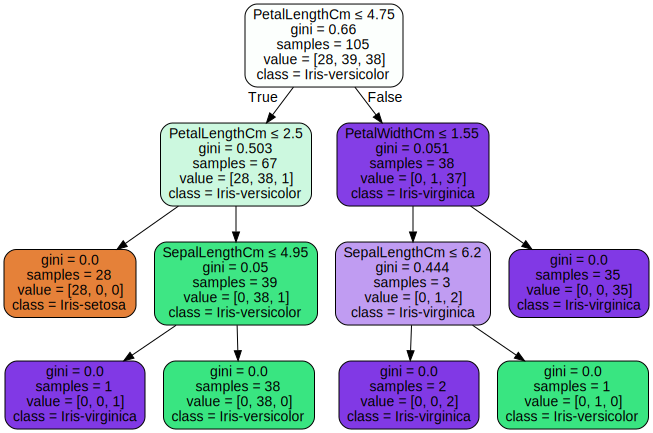

In [203]:
graph

# Visualizing Decision Tree using Sklearn

In [171]:
from sklearn import tree

[Text(697.5, 951.3000000000001, 'PetalLengthCm <= 4.75\ngini = 0.66\nsamples = 105\nvalue = [28, 39, 38]\nclass = Iris-versicolor'),
 Text(279.0, 679.5, 'PetalLengthCm <= 2.5\ngini = 0.503\nsamples = 67\nvalue = [28, 38, 1]\nclass = Iris-versicolor'),
 Text(139.5, 407.70000000000005, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]\nclass = Iris-setosa'),
 Text(418.5, 407.70000000000005, 'SepalLengthCm <= 4.95\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]\nclass = Iris-versicolor'),
 Text(279.0, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(558.0, 135.89999999999998, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = Iris-versicolor'),
 Text(1116.0, 679.5, 'PetalWidthCm <= 1.55\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = Iris-virginica'),
 Text(976.5, 407.70000000000005, 'SepalLengthCm <= 6.2\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(837.0, 135.89999999999998, 'gini = 0.0\nsamples = 2

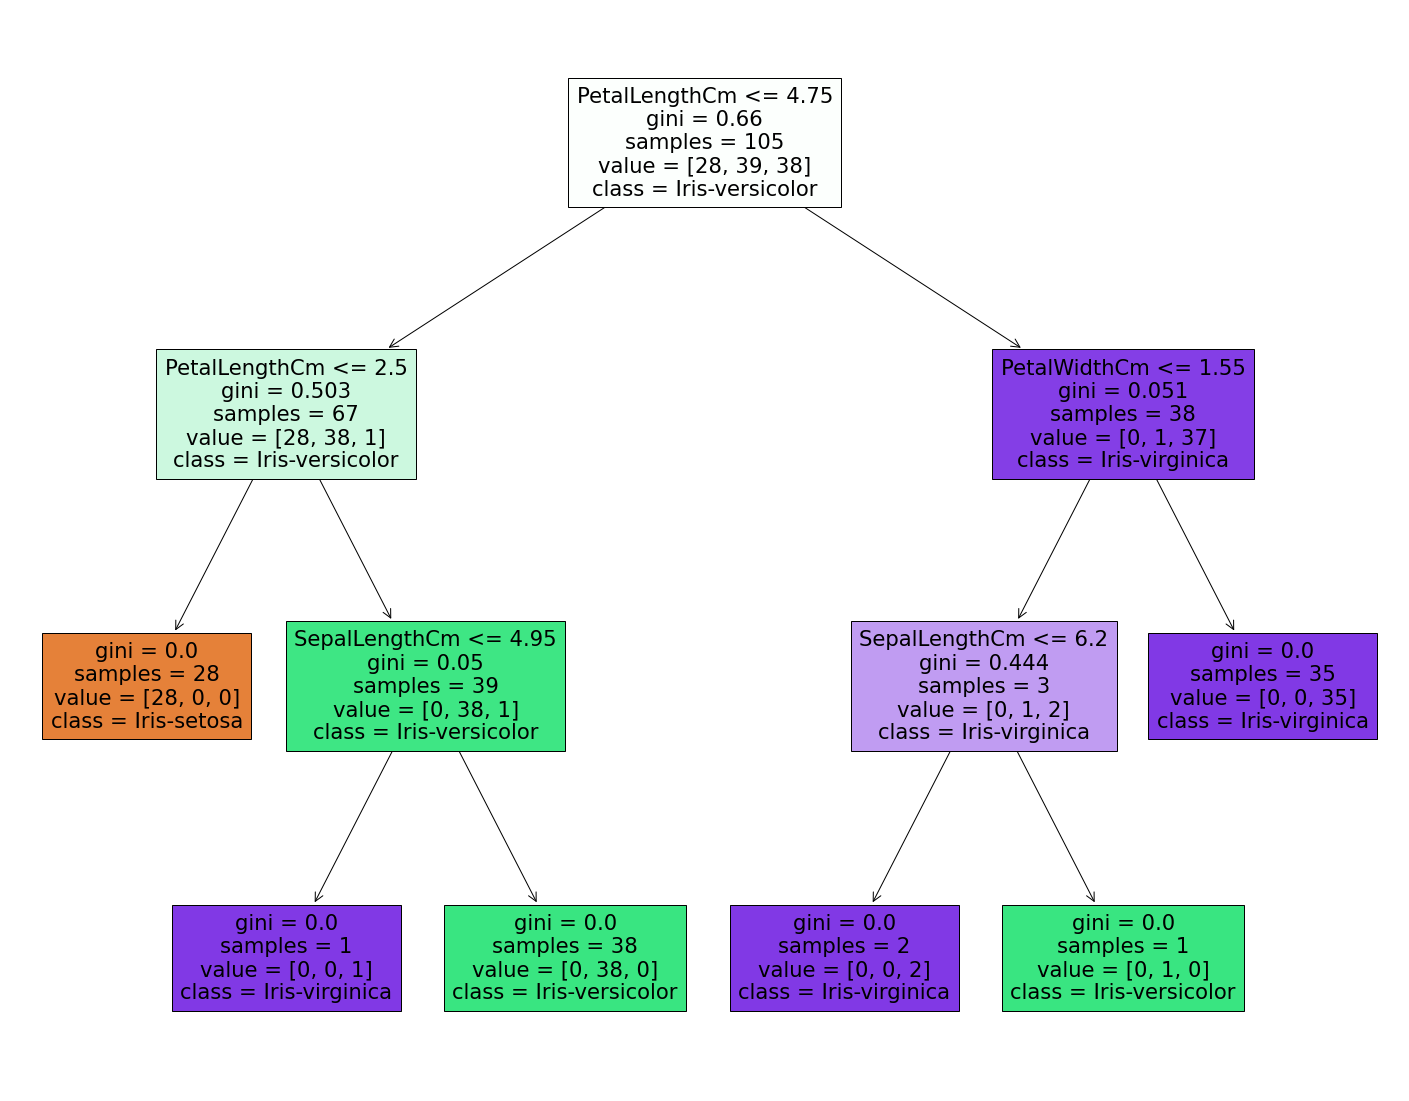

In [172]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtree, feature_names=features,class_names=target, filled=True)